# Measure Model Performance for Logistic Regression Models

In [1]:
#======================================================================================================
# CODE NAME     : Measure Model Performance.py
# PURPOSE       : Demonstrate application of model performance statistics Pandas,Statsmodels and so on 
# APPLICATION   : Marketing Campaign
#=======================================================================================================

In [3]:
# Get the Training and Validation data for Marketing Campaign
import numpy as np
import pandas as pd

train = pd.read_excel("C:\\Users\\Training\\Data Science using SAS and Python\\Data\\train.xlsx")
valid = pd.read_excel("C:\\Users\\Training\\Data Science using SAS and Python\\Data\\valid.xlsx")
train.head()

,Selected,Ins,AcctAge,DDA,DDABal,CashBk,Checks,DirDep,NSF,NSFAmt,...,MILORes,MIHMVal,MIAge,MICRScor,SelectionProb,SamplingWeight,brclus1,brclus2,brclus3,B_DDABal
0,1,0,0.7,1,1986.81,0,1,1,0,0.00,...,0,0,0,0,0.666746,1.499822,0,0,0,58
1,1,0,0.5,1,1594.84,0,1,0,0,0.00,...,0,0,0,0,0.666746,1.499822,0,1,0,53
2,1,0,8.8,1,1437.57,0,12,1,0,0.00,...,0,0,0,0,0.666746,1.499822,0,1,0,51
3,1,0,0.8,1,190.03,0,1,0,1,5.65,...,0,0,0,0,0.666746,1.499822,1,0,0,15
4,1,0,3.0,1,1772.13,0,1,1,0,0.00,...,0,0,0,0,0.666746,1.499822,0,1,0,55


In [4]:
selected = ['MIPhone','Teller','MM','LOC','CD','ATMAmt','brclus2','Inv','Dep','IRA','MTGBal',
            'AcctAge','SavBal','B_DDABal','Sav','Phone','CCBal','DirDep','ATM']; 

valid1 = valid
valid = valid[selected]
valid[selected]

,MIPhone,Teller,MM,LOC,CD,ATMAmt,brclus2,Inv,Dep,IRA,MTGBal,AcctAge,SavBal,B_DDABal,Sav,Phone,CCBal,DirDep,ATM
0,0,0,0,0,0,268.88,0,0,1,0,0.00,0.7,0.00,58,0,0,0.00,1,1
1,0,1,0,0,0,278.07,1,0,1,0,0.00,0.5,425.06,53,1,0,65.76,0,1
2,0,0,0,0,0,391.63,1,0,2,0,94539.95,8.8,0.00,51,0,0,85202.99,1,1
3,1,0,0,0,0,1582.34,0,0,3,0,0.00,0.8,11.47,15,1,0,0.00,0,1
4,0,1,0,0,0,0.00,1,0,2,0,0.00,3.0,0.00,55,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21507,0,0,0,0,0,0.00,1,0,0,0,0.00,20.9,0.00,72,0,0,0.00,0,0
21508,0,0,1,1,0,0.00,1,0,0,0,0.00,2.8,0.00,72,0,0,8791.40,0,0
21509,0,0,0,0,0,0.00,1,0,0,0,0.00,3.9,0.00,72,0,0,0.00,0,0
21510,0,0,0,0,0,1346.41,0,0,3,0,0.00,19.1,0.00,59,0,2,0.00,1,1


# Fit Logistic Regression Model on Training Data

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
logit_model = smf.logit(formula = 'Ins ~ MIPhone + Teller + MM + LOC + CD + ATMAmt + brclus2 + Inv + Dep + IRA + MTGBal + AcctAge + SavBal + B_DDABal + Sav + Phone + CCBal + DirDep + ATM', 
                        data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.531248
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Ins   No. Observations:                21512
Model:                          Logit   Df Residuals:                    21492
Method:                           MLE   Df Model:                           19
Date:                Sun, 04 Jul 2021   Pseudo R-squ.:                  0.1766
Time:                        11:51:21   Log-Likelihood:                -11428.
converged:                       True   LL-Null:                       -13879.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0004      0.058    -34.602      0.000      -2.114      -1.887
MIPhone       -0.4517      0.056     -8.007      0.000      -0.562      -0.341
Teller         0.0552      0.008      6.846      0.000       0.039       0.071
MM             0.7898      0.050     15.940      0.000       0.693       0.887
LOC           -0.3192      0.069     -4.616      0.000      -0.455      -0.184
CD             0.9625      0.047     20.372      0.000       0.870       1.055
ATMAmt      2.612e-05   5.51e-06      4.739      0.000    1.53e-05    3.69e-05
brclus2        0.2736      0.036      7.497      0.000       0.202       0.345
Inv            0.5373      0.101      5.298      0.000       0.339       0.736
Dep           -0.0734      0.014     -5.271      0.000      -0.101      -0.046
IRA            0.3149      0.071      4.410      0.000       0.175       0.455
MTGBal     -3.108e-06   8.07e-07     -3.854      0.000   -4.69e-06   -1.53e-06
AcctAge       -0.0200      0.003     -7.445      0.000      -0.025      -0.015
SavBal         0.0001   4.96e-06     26.118      0.000       0.000       0.000
B_DDABal       0.0179      0.001     28.355      0.000       0.017       0.019
Sav            0.2388      0.039      6.056      0.000       0.162       0.316
Phone         -0.0632      0.019     -3.360      0.001      -0.100      -0.026
CCBal         2.9e-06   8.27e-07      3.506      0.000    1.28e-06    4.52e-06
DirDep        -0.1799      0.040     -4.487      0.000      -0.259      -0.101
ATM           -0.1456      0.040     -3.606      0.000      -0.225      -0.066
==============================================================================
"""

# Score the Validation data using Model fitted on Training data

In [5]:
p_hat = pd.DataFrame(logit_model.predict(valid), columns = ['_PROB_'])
p_hat["Observation"] = p_hat.index.values
p_hat

,_PROB_,Observation
0,0.144414,0
1,0.093878,1
2,0.222140,2
3,0.203252,3
4,0.240312,4
...,...,...
10747,0.806091,10747
10748,0.576146,10748
10749,0.240617,10749
10750,0.342071,10750


In [6]:
# Adjust the predicted probabilities to account for oversample events
pi1 = 0.02 # Population Proportion of events
rho1 = 0.346361 # Sample proportion of events

p_hat["_PROB_"] = (p_hat._PROB_ * (1-rho1)) * pi1 / ((1-p_hat._PROB_)*rho1*(1-pi1)) + (p_hat._PROB_)*(1-rho1)*(pi1)
p_hat

,_PROB_,Observation
0,0.008389,0
1,0.005217,1
2,0.013903,2
3,0.012482,3
4,0.015324,4
...,...,...
10747,0.170640,10747
10748,0.059883,10748
10749,0.015349,10749
10750,0.024496,10750


# ROC Curve and AUC for Customer Purchasing Insurance Product

AUC:  0.78


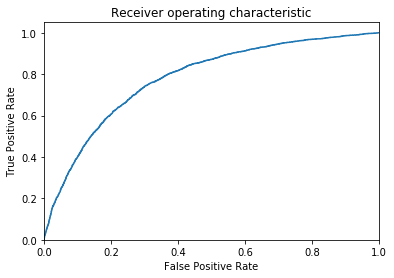

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(valid1.Ins, p_hat._PROB_)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
print("AUC: ", roc_auc[1].round(2))
plt.show()

# Get the Confusion Matrix across the range of cutoffs on Validation data

In [8]:
roc = pd.DataFrame()
specificity = pd.Series(fpr[1])
sensitivity = pd.Series(tpr[1])
roc['cutoff'] = p_hat._PROB_
roc['specif'] = specificity
roc['tp'] = pi1*sensitivity
roc['fn'] = pi1*(1-roc['tp'])
roc['tn'] = (1-pi1)*roc['specif']
roc['fp'] = (1-pi1)*(roc['specif'])
roc['depth'] = roc['tp'] + roc['fp']
roc['pospv'] = roc['tp'] / roc['depth']
roc['lift'] = roc['pospv'] / pi1
roc.head(50)

,cutoff,specif,tp,fn,tn,fp,depth,pospv,lift
0,0.008389,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,NaN,NaN
1,0.005217,0.000000,0.000005,0.020000,0.000000,0.000000,0.000005,1.000000,50.000000
2,0.013903,0.000000,0.000021,0.020000,0.000000,0.000000,0.000021,1.000000,50.000000
3,0.012482,0.000142,0.000021,0.020000,0.000139,0.000139,0.000161,0.133493,6.674644
4,0.015324,0.000142,0.000043,0.019999,0.000139,0.000139,0.000182,0.235543,11.777126
5,0.010592,0.000142,0.000054,0.019999,0.000139,0.000139,0.000193,0.278055,13.902736
6,0.013251,0.000142,0.000064,0.019999,0.000139,0.000139,0.000204,0.316088,15.804387
7,0.235517,0.000285,0.000064,0.019999,0.000279,0.000279,0.000343,0.187710,9.385517
8,0.026689,0.000285,0.000075,0.019998,0.000279,0.000279,0.000354,0.212352,10.617597
9,0.238004,0.000427,0.000075,0.019998,0.000418,0.000418,0.000494,0.152352,7.617602


# Plot the Lift Chart on Validation Data

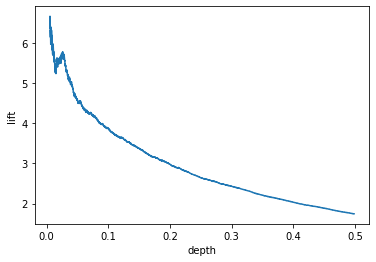

In [9]:
import seaborn as sns
roc1 = roc.loc[(roc['depth'] >= 0.005) & (roc['depth'] <= 0.50)]
sns.lineplot(x = "depth", y = "lift", data = roc1)

# Using Profit to access the fit

In [11]:
# Get the Total Profit and Average Profit at cutoff = 0.01
p_hat["sampwt"] = pi1/rho1 * valid1["Ins"] + ((1-pi1) / (1-rho1)) * (1-valid1["Ins"])
p_hat["decision"] = np.where(p_hat._PROB_ > 0.01, 1, 0)
p_hat["profit"] = p_hat["decision"] * valid1["Ins"] * 99 - p_hat["decision"] * (1-valid1["Ins"]) * 1
p_hat["adj_profit"] = (p_hat["decision"] * valid1["Ins"] * 99 - p_hat["decision"] * (1-valid1["Ins"]) * 1) * p_hat["sampwt"]
p_hat["Total Profit"] = p_hat.adj_profit.sum()
p_hat["Avg. Profit"] = p_hat.adj_profit.mean()

p_hat[["Total Profit", "Avg. Profit"]].drop_duplicates()

,Total Profit,Avg. Profit
0,12954.652407,1.20486


In [12]:
# Get the maximum Profit across the range of cutoffs
roc["AveProf"] = 99*roc["tp"] - 1*roc["fp"]
roc[roc["AveProf"] == roc["AveProf"].max()]

,cutoff,specif,tp,fn,tn,fp,depth,pospv,lift,AveProf
2839,0.005347,0.443796,0.016992,0.01966,0.43492,0.43492,0.451913,0.037601,1.880062,1.247335
